In [2]:
cd ../jecs

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs


In [3]:
import torch
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Computation device: cpu



In [3]:
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 

fp='../test_files/00BF1FDD-65BC-E311-A63F-00259073E3D0_poet.root'

pts2, etas2, area2, npvs2, gen_pts2, jecs2 = list(load_root_files([fp]))[0]
mask = pts2 > 450
pts2 = pts2[mask]
etas2 = etas2[mask]
area2 = area2[mask]
npvs2 = npvs2[mask]
gen_pts2 = gen_pts2[mask]
jecs2 = jecs2[mask]


In [20]:
pts2,jecs2

(array([513.2901 , 467.62134, 588.1106 , 458.53036, 637.0216 , 503.31882,
        502.9872 , 451.3839 , 470.25613, 479.92496, 524.3087 , 523.32416,
        489.10095, 698.3761 , 506.8922 ], dtype=float32),
 array([1.0376376, 1.0346445, 1.0571502, 1.0357634, 1.0423253, 1.0274358,
        1.0452949, 1.034287 , 1.0269151, 1.0409058, 1.0446347, 1.033016 ,
        1.0327853, 1.0365775, 1.037209 ], dtype=float32))

In [5]:
import numpy as np
#jec_dataset2 = JetEnergyCorrectionDataset(pts2, etas2, area2, npvs2, gen_pts2, jecs2)
x=np.transpose(np.array([pts2,etas2,area2,npvs2,gen_pts2]))
y=np.array(jecs2)

In [5]:
# Load the dataset
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 


pts, etas, area, npvs, gen_pts, jecs = load_energy_flow()
"""
pts.extend(pts2)
etas.extend(etas2)
area.extend(area2)
npvs.extend(npvs2)
gen_pts.extend(gen_pts2)
jecs.extend(jecs2)"""

jec_dataset = JetEnergyCorrectionDataset(pts, etas, area, npvs, gen_pts, jecs)

Test MSE: 0.15407399833202362


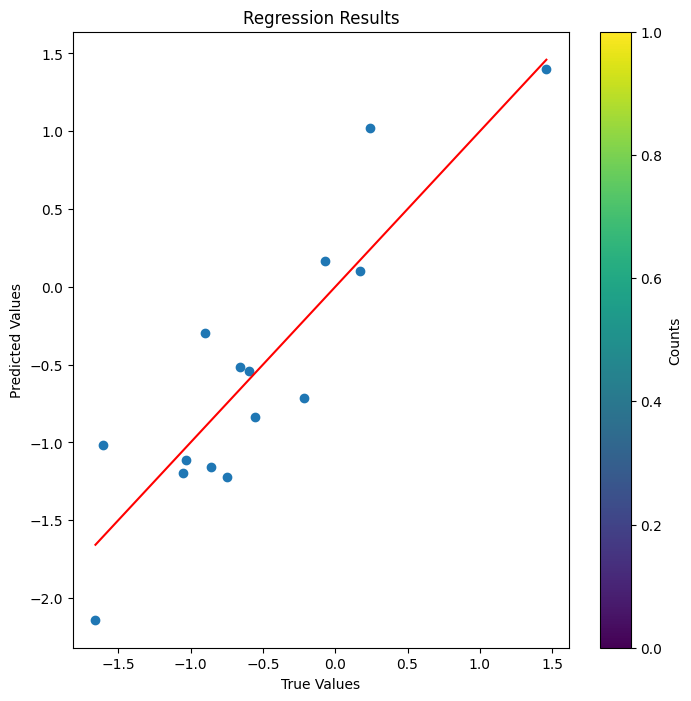

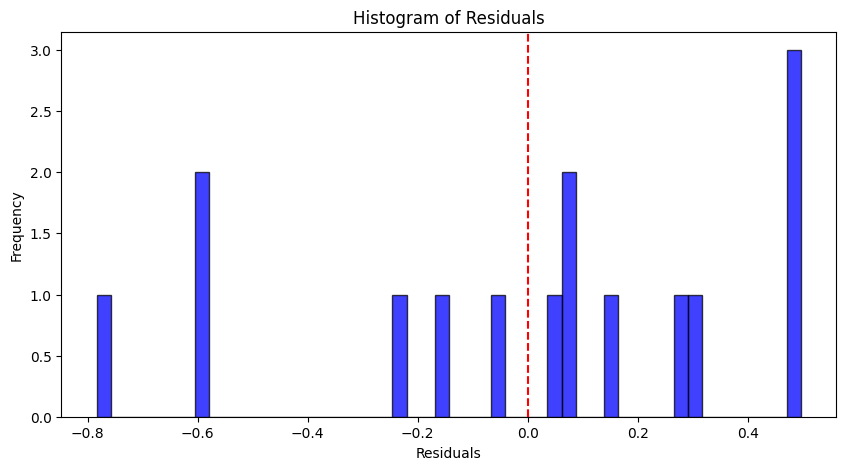

NameError: name 'jet_data' is not defined

In [10]:
import importlib
import dataset
importlib.reload(dataset)

import eval_multiple_src as eval
from j_model import ShallowMLP

importlib.reload(eval)
eval.run(x,y)

In [6]:
y.shape

(15,)